# What Makes a Hit?
# Predicting the Popularity of a Songs on Spotify

### Presented by Malachi Hale

## Executive Summary
### Background

Spotify is the world's largest music and audio streaming service provider. Spotify has a library of over 70 million tracks. Each of the tracks in Spotify's library receives a number indicating that track's popularity index. The popularity index is structured such that 0 is the least popular and 100 is the most popular. 

Spotify has an algorithm which calculates each tracks popularity index score based on how many plays the track receives, as well as how recent those plays were. 

To begin with, we acquired a sample of Spotify library as of April 2021. Our data contains:
 - 586,672 tracks in the Spotify library, 
 - descriptive features of each track, and 
 - the songs popularity index as of April 16, 2021.

Our data sources is located here: 
 - https://www.kaggle.com/subhaskumarray/spotify-tracks-data
 
**A Note on Spotify's Descriptive Features**

Many of the descriptive features that Spotify assigns to some of its tracks are questionable. For example, audiobooks often get a high "danceability" score. Clearly, it is not reasonable to call an audiobook with no music "danceable". It is not clear how Spotify assigns each descriptive feature to each track in their API.

The purpose of this project, however, is to use Spotify's own attributes to predict Spotify's own popularity index score. Thus, we will use the attributes from Spotify's own API to build our models, even when we may personally disagree that these attributes accurately describe the tracks.

**Project Goal**

In this project, we pose the question: can we use features of each track to predict where the track is likely to place on the popularity index? More specifically, can we build a model that uses features of tracks to predict that tracks placement on the popularity index?

**Outline** 

We will take the following steps:
 - **Acquire** data from the Spotify API from April 2021. 
 - **Prepare** the data by 
     - imputing null values, 
     - making columns easier to process, 
     - removing outliers, 
     - splitting data into train, validate, and test datasets, 
     - and adding scaled columns.
 - **Explore** the data by creating visualizations, running feature engineering, and creating cluster groupings. 
 - **Model** the data to predict popularity of each song. 
 
**Key findings**

We will demonstrate that it is possible to use the features of each track to predict that track's popularity, with a higher validity than the baseline model. 

**Recommendation**

In this project, I used the models I was familiar with to make predictions about each track's popularity. There may be more effective models with which I am not familiar. This is worth exploring to predict a song's popularity. 

## Import Libraries

In [160]:
#Disable Warnings
import warnings
warnings.filterwarnings("ignore")

#Import pandas for dataframes
import pandas as pd

#Graphing imports
import seaborn as sns
import matplotlib.pyplot as plt

#Prepare functions 
from prepare import prepare_data
from prepare import data_no_outliers
from prepare import split_data
from prepare import add_scaled_columns

#Import for Clustering 
from sklearn.cluster import KMeans

#Import stastitics
from scipy import stats

#Import for train, test, split
from sklearn.model_selection import train_test_split

#Impute null values
from sklearn.impute import SimpleImputer

#Min Max Scaler
import sklearn.preprocessing

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

#Regression models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

#Evaluate Mean Squared Error
from sklearn.metrics import mean_squared_error

## Acquire Data

We have previously downloaded the data into a CSV file in this repository. We will read that CSV into a DataFrame below. To download this file yourself, please see the link:
 - https://www.kaggle.com/subhaskumarray/spotify-tracks-data

In [161]:
df = pd.read_csv(r'/Users/malachihale/codeup-data-science/End-to-End-Project/tracks.csv')

In [4]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586672 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [18]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [5]:
len(df)

586672

We have 58,672 tracks in our dataset.

Let's see what the most recent tracks in our datasset are.

In [6]:
df[df.release_date == df.release_date.max()].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
86695,0usLN2VpccZQwWkGLm3Odm,2013 Will Be My Year,0,161045,0,['Jay and Others :>'],['3pwVqfe1xCnGTTnbVjYf74'],2021-04-16,0.347,0.965,10,-6.014,1,0.1420,0.05040,0.000000,0.3430,0.392,90.987,4
92864,1Nlstdx5q4GVUyaQqHYvqh,Inner City Life - 2020 Remaster,0,422183,0,['Goldie'],['2SYqJ3uDLLXZNyZdLKBy4M'],2021-04-16,0.384,0.889,7,-6.548,1,0.0936,0.00226,0.425000,0.0728,0.112,154.886,4
93915,4BvreMl8IerW37NLYtBZ9e,Blow Your Mind (Mwah),0,178583,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2021-04-16,0.677,0.796,2,-4.761,0,0.1170,0.01880,0.000000,0.0948,0.494,108.851,4
93916,4K9PNGfQMYnMsY9zEDKDLC,Break My Heart,0,352453,0,"['Dua Lipa', 'Moodymann']","['6M2wZ9GZgrQXHCFfjv46we', '6pohviZSNRueSX7uNu...",2021-04-16,0.772,0.637,4,-7.846,0,0.0494,0.02200,0.035300,0.0898,0.409,113.022,4
93917,5xZAMT6xqi8sXUHcccwzK2,Love Again,0,258004,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2021-04-16,0.659,0.667,11,-4.668,0,0.0339,0.00173,0.000029,0.1000,0.468,115.982,4


Above are some of the most recent songs in our dataset. Recall this is data from April 2021. Perhaps you may recognize some of the titles. 

Now lets see what the most popular songs in our dataset are.

In [7]:
df.sort_values(by = "popularity", ascending = False).head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


Above are the most popular songs in our dataset. "Peaches" by Justin Bieber featuring Daniel Caesar and Giveon is the most popular song as of the week of April 16, 2021.

### Visualizations of Univariate Data

Below are the distributions of each of the variables in our dataset.

#### Popularity

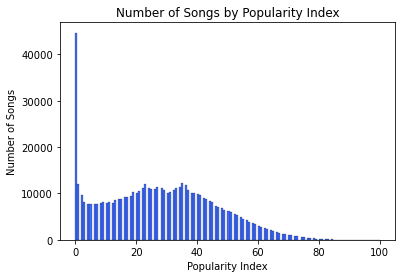

In [14]:
#Set palette to bright
sns.set_palette('bright')
#Graph popularity distribution
popularity = sns.histplot(x = df.popularity)
#Set labels
labels = popularity.set(ylabel = "Number of Songs", xlabel = "Popularity Index", title = "Number of Songs by Popularity Index")

The score 0 appears to be most common on the popularity index.

In [118]:
#Calculating the percent of songs with popularity index 0.
len(df[df.popularity == 0])/len(df)

0.07617544385960127

**Note**

Popular songs are overrepresented in our sample. The majority of Spotify's 70 million tracks of a popularity index of 0. In our data, only around 7.6% of the tracks have a popularity index of 0.

#### Duration

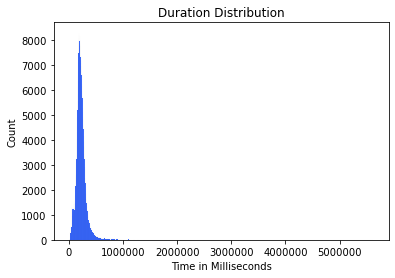

In [119]:
#Visualize duration distribution
duration = sns.histplot(df.duration_ms)
#Format ticks and labels
duration.ticklabel_format(useOffset=False, style='plain')
labels = duration.set(title = "Duration Distribution", xlabel = "Time in Milliseconds")

There appears to be some extreme outliers in length in our dataset. Let's see what some of the outliers are.

Here are the three longest tracks in our dataset.

In [8]:
df.sort_values(by = 'duration_ms', ascending = False).head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
326329,3EEv9UCeZdn4MVFv8tsO1E,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,3,5621218,0,['ท่านพุทธทาส'],['2ySk9zib3PuomvMGmCqdTA'],1979-07-28,0.638,0.537000,8,-13.365,1,0.7750,0.82500,0.00000,0.345,0.401,131.446,3
450241,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,5403500,0,['Sound Dreamer'],['4YJlpG8fCq38GnS8ElByiF'],2013-06-05,0.000,0.000099,2,-21.669,1,0.0000,0.11100,0.39200,0.137,0.000,0.000,0
131876,6rGikpwOv3LXaHWVCYbMNC,New Year's Eve 2015 Party Hits - Full DJ Party...,0,5042185,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],2014-12-19,0.457,0.891000,11,-4.596,0,0.0627,0.00467,0.00109,0.294,0.731,129.516,4


In [121]:
#Calculate median song length
df.duration_ms.median()

214893.0

The longest track is around 90 minutes long (it appears to be an extended religious prayer), whereas the median song is only around 3 and a half minutes long. 

#### Explicit

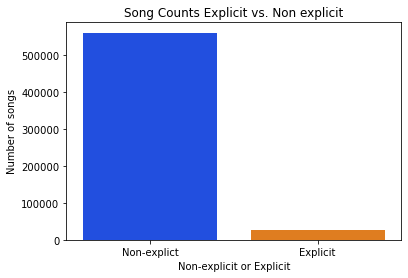

In [122]:
#Graph explicit vs. non-explicit value counts
explicit = sns.countplot(df.explicit)
#Format ticks and labels
explicit.set_xticklabels(['Non-explict','Explicit'])
labels = explicit.set(ylabel = "Number of songs", xlabel = "Non-explicit or Explicit", title = "Song Counts Explicit vs. Non explicit")

There are far more non-explicit songs that explicit songs.

#### Artist

Below is a chart of the the top twenty artists with the most tracks in the dataset.

In [123]:
df[['artists', 'id']].groupby('artists').count().sort_values(by = "id", ascending = False).head(20)

,id
artists,
['Die drei ???'],3856
['TKKG Retro-Archiv'],2006
['Benjamin Blümchen'],1503
['Bibi Blocksberg'],1472
['Lata Mangeshkar'],1373
['Bibi und Tina'],927
"['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']",905
['Francisco Canaro'],891
['Ella Fitzgerald'],870


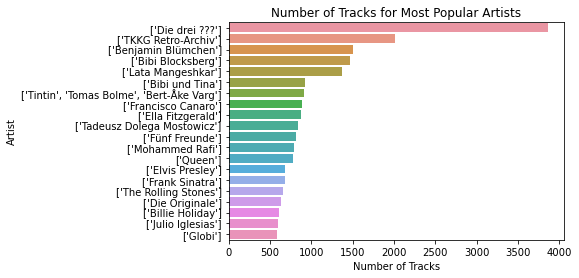

In [95]:
most_popular = df[['artists', 'id']].groupby('artists').count().sort_values(by = "id", ascending = False).head(20)
most_popular_barplot = sns.barplot(x = most_popular.id, y = most_popular.index)
labels = most_popular_barplot.set(title = "Number of Tracks for Most Popular Artists", xlabel = "Number of Tracks", ylabel = "Artist")

#### Release Date of the track

In [124]:
#We convert release date to datetime format to graph it more easily.
df.release_date = pd.to_datetime(df.release_date)

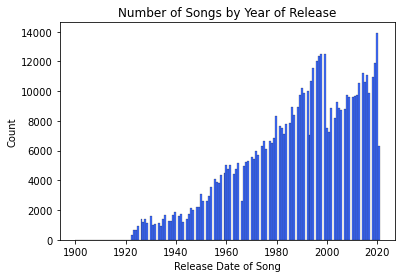

In [125]:
#Visualize release date distribution
release_dates = sns.histplot(df.release_date.dt.year)
#Set labels
labels = release_dates.set(xlabel = "Release Date of Song", title = "Number of Songs by Year of Release")

Our distribution is left-skewed, thus including more modern songs. There appears to be of peak of songs from two periods:
 - the 1990s and
 - the current era 2019-2021.

#### Danceability

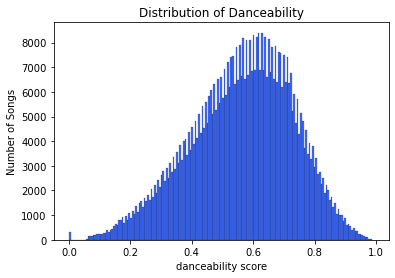

In [126]:
#Graph danceability distribution
danceability = sns.histplot(df.danceability)
#Show tick labels
labels = danceability.set(xlabel = "danceability score", ylabel = "Number of Songs", title = "Distribution of Danceability")

Danceability of the tracks is roughly normally distributed.

#### Energy 

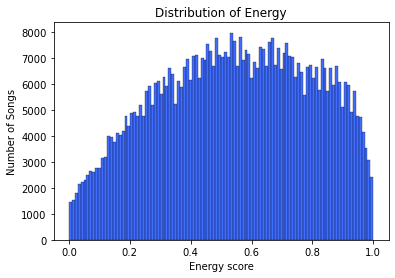

In [127]:
#Graph energy distribution
energy = sns.histplot(df.energy)
#Create ticks and labels
labels = energy.set(xlabel = "Energy score", ylabel = "Number of Songs", title = "Distribution of Energy")

Energy of each song is roughyl normally distributed.

#### Key

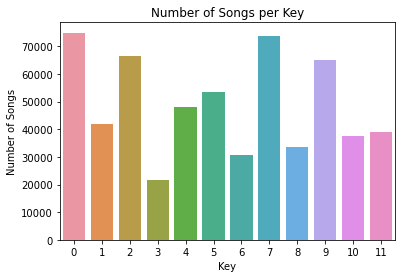

In [11]:
#Create countplot for each key value
key = sns.countplot(df.key)
#Create labels
labels = key.set(xlabel = "Key", ylabel = "Number of Songs", title = "Number of Songs per Key")

#### Loudness

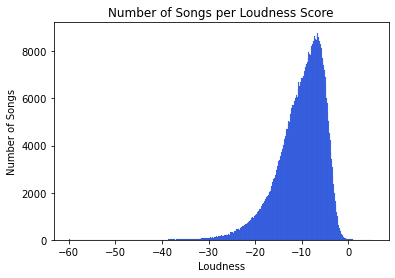

In [129]:
#Graph loudness distribution
loudness = sns.histplot(df.loudness)
#Create labels
labels = loudness.set(xlabel = "Loudness", ylabel = "Number of Songs", title = "Number of Songs per Loudness Score")

Loudness is roughly normally distributed with a left skew.

#### Mode

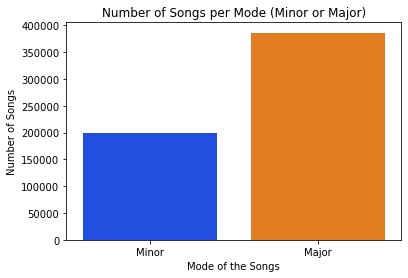

In [130]:
#Count of minor and major modes
mode = sns.countplot(df['mode'])
#Set tick labels
mode.set_xticklabels(['Minor','Major'])
labels = mode.set(xlabel = "Mode of the Songs", ylabel = "Number of Songs", title = "Number of Songs per Mode (Minor or Major)")

#### Speechiness

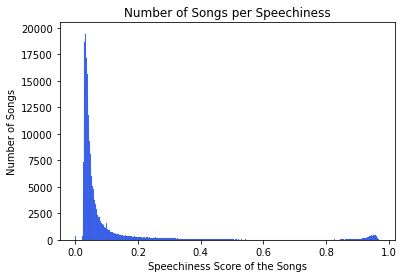

In [131]:
#Graph speechiness distribution
speechiness = sns.histplot(df['speechiness'])
#Create labels
labels = speechiness.set(xlabel = "Speechiness Score of the Songs", ylabel = "Number of Songs", title = "Number of Songs per Speechiness")

Speechiness is right-skew. There appears to be many outliers that are very high in speechiness, likely audiobooks or podcasts.

#### Acousticness

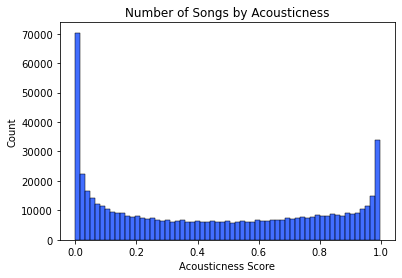

In [15]:
#Graph acousticness 
acousticness = sns.histplot(df.acousticness)
#Create labels
labels = acousticness.set(xlabel = "Acousticness Score", title = "Number of Songs by Acousticness")

#### Instrumentalness

**Note**

There were so many tracks with instrumentalness at 0 that the graph appeared empty if we simply graphed the raw data. Below we only graph the tracks with instrumentalness above 0.01.

The tracks with instrumentalnes 0 are likely audiobooks or podcasts.

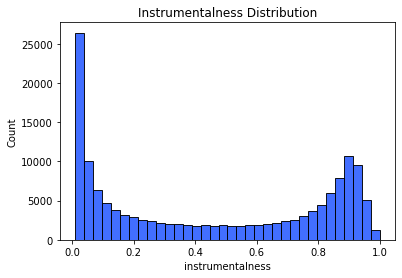

In [133]:
#Graph instrumentalness distribution
instrumentalness = sns.histplot(df[df.instrumentalness > 0.01].instrumentalness)
#Create labels
labels = instrumentalness.set(title = "Instrumentalness Distribution")

#### Liveness

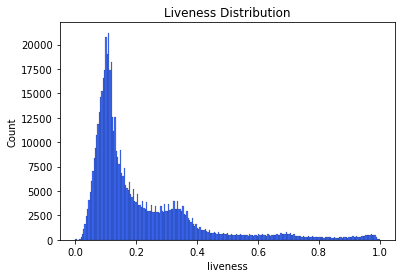

In [134]:
#Graph liveliness
liveness = sns.histplot(df.liveness)
#Create labels
labels = liveness.set(title = "Liveness Distribution")

Liveness is right skew.

#### Tempo

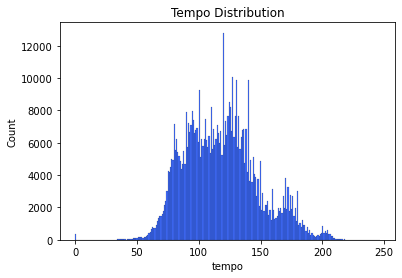

In [135]:
#Graph tempo
tempo = sns.histplot(df.tempo)
#Create labels
labels = tempo.set(title = "Tempo Distribution")

Tempo is roughly normally distributed.

#### Time Signature

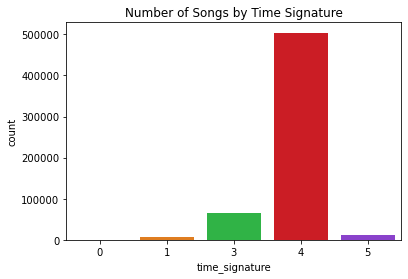

In [136]:
#Create time-signature distribution
time_signature = sns.countplot(df.time_signature)
#Create labels
labels = time_signature.set(title = "Number of Songs by Time Signature")

Unsurprisingly, 4/4 beats are most common.

### Key Takeaways

 - Most of our features have a roughly normal distribution. 
 - Our data has many outliers. 
 - Our dataset has categorical and continuous features. The categorical features are already numeric. 

## Prepare Data

Please see the `prepare.py` file in this repository for more information about the functions used to prepare the data in this section.

### Handle Missing Values

The `prepare_data` eliminates and rows or columns with excessive null values. The remaining null values are then imputed with the most frequent value of that column.

In [96]:
df = prepare_data(df)

### Remove Outliers

We remove the extreme outliers from our dataset.

In [97]:
df = data_no_outliers(df)

In [98]:
df = df.reset_index()

In [99]:
len(df)

403324

We have removed over 10_000 rows from the dataset.

### Date Column

For this project, I am going to conver the `release_date` column into `year_of_release`, since some of the values in the `release_date` column only contain data for year.

In [100]:
df['year_of_release'] = pd.to_datetime(df.release_date)
df['year_of_release'] = df['year_of_release'].dt.year

### Train, Validate, Test Split

In [101]:
train, validate, test = split_data(df)

In [102]:
len(train)

225861

In [103]:
len(validate)

96798

In [104]:
len(test)

80665

### Add Scaled Columns

Since `loudness` and `duration_ms` are not on the 0 to 1 scale, we scale those features using the Min-Max Scaler.

The Min-Max Scaler maps every value to a value between 0 and 1.

In [105]:
train, validate, test = add_scaled_columns(train, validate, test)

In [106]:
train.head()

,index,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled
336488,487178,2LJQHkTucSOJf9hQL0Q8ae,Mein Ding,49,265587,0,['Udo Lindenberg'],['7iWcRnQMinCoV2u5ICgsW0'],2008-03-28,0.618,...,0.0311,0.00895,0.007490,0.0840,0.455,126.973,4,2008,0.497902,0.857457
318542,458324,1SwJzgDCwrpBGcvldOxDs1,Bonjour (V'là les nouvelles),15,182960,0,"[""Chagrin D'amour""]",['1LTi4SuPK0G9juYKxU6AAG'],1982-01-01,0.761,...,0.0700,0.29900,0.000000,0.3510,0.962,127.504,4,1982,0.341024,0.838799
243364,357260,3CQkJpY08xj0pB2jBeHUjV,Nirvana Kyuchek,28,241920,0,"['Slavi Trifonov', 'Ku-Ku Band']","['4hcbbb8RBjFjCuMhmVv1b9', '6dTTAcKWN7BmRGAmmA...",2013-02-12,0.695,...,0.0564,0.01220,0.005590,0.0522,0.466,93.917,4,2013,0.452967,0.816115
37863,65892,2dxRzFDDv3QcSMQ0vIgqMF,Brillante sobre el mic,51,248560,0,['Fito Paez'],['1bZNv4q3OxYq7mmnLha7Tu'],1992-02-01,0.645,...,0.0254,0.17600,0.000003,0.2280,0.745,105.833,4,1992,0.465574,0.777793
313199,450998,1xRP7GwKppuawKo4CbiTl2,Bangun Cinta,52,202552,0,['3 Composers'],['145zDAbvELoocgZ4bZrSXe'],2018-04-13,0.689,...,0.0349,0.68500,0.000000,0.1060,0.528,88.022,4,2018,0.378222,0.808668


In [29]:
validate.head()

,index,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled
240365,352753,4qEHMJyER7OntYTtPsIT1W,11 RAZONES,63,213180,0,['Aitana'],['7eLcDZDYHXZCebtQmVFL25'],2020-12-10,0.550,...,0.0508,0.00599,0.0,0.2140,0.348,166.011,4,2020,0.398401,0.868063
259209,377554,0jtguxOX9085ws8UtRiQv1,Mooi Weer Vandaag,35,217733,0,['Bart Kaell'],['7vwpGdC4NswrFH2szqnzy3'],1993-11-22,0.757,...,0.0459,0.14700,0.0,0.2490,0.817,137.135,4,1993,0.407045,0.733525
373606,546900,4YLfmYMEzdvnkgzKYjRKPw,ひとかけらの純情,20,187320,0,['Saori Minami'],['4Q1uC5VlYJw6cnl37BkGS3'],1971,0.689,...,0.0283,0.67600,0.0,0.1060,0.735,110.660,4,1971,0.349302,0.844621
142758,221145,1n5JuPVZhc8gIeEaQnaxAu,Eshet Haikar,5,278518,0,"['Arik Einstein', 'Shalom Hanoch']","['16XberediOtO5CaMrx85cR', '1Eks6sKVw6yepoeTbW...",1970,0.528,...,0.0374,0.21500,0.0,0.3860,0.732,76.024,4,1970,0.522453,0.665970
340082,492501,5HPSvCWCM9TvsagA1idzuw,Speaking In Tongues,45,243227,1,"['Hilltop Hoods', 'Chali 2na']","['7dlqUnjoF2U2DkNDMhcgG4', '1ZJlXFkFDBsjSuYyjV...",2012-01-01,0.691,...,0.1110,0.26300,0.0,0.0321,0.853,91.998,4,2012,0.455449,0.834975


In [30]:
test.head()

,index,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled
49416,82801,0WDk4azsowshw4uPH9hM3s,Sweet Sorrow - Mono; 2009 Remaster,0,142627,0,['Cliff Bennett & The Rebel Rousers'],['4SwsfZi8Wl6WyKArywOjmR'],2009-04-06,0.445,...,0.0345,0.423000,0.000000,0.0726,0.603,144.185,4,2009,0.264447,0.859810
199305,298030,2RUQPfpb1hJCkMsndlB7iG,Mighty Quinn,28,389200,0,"[""Manfred Mann's Earth Band""]",['2utNxkLhreF1oIfO8kQT3q'],1978,0.379,...,0.0424,0.005780,0.003000,0.0668,0.523,100.405,4,1978,0.732597,0.744488
188400,282960,7DJoIiy2rwQmgq49ATq62v,God Only Knows,27,275400,0,['James'],['0qLNsNKm8bQcMoRFkR8Hmh'],1990,0.318,...,0.0791,0.000371,0.001570,0.2590,0.628,135.773,4,1990,0.516533,0.750325
161999,248202,0kJN4zXuwYKp6k9UDvjSrM,Weekend in New England,32,224827,0,['Barry Manilow'],['3alW3LYQS8K29z8C8NSLIX'],1973,0.255,...,0.0275,0.544000,0.000030,0.1180,0.235,80.685,3,1973,0.420514,0.766150
383661,559417,6fCfuXlm4OvK5OXwADQp8D,ダカラドオシタ,38,199124,0,['Arukara'],['3FNVZovYeq27HeeJf3ogLU'],2012-07-25,0.578,...,0.1110,0.006350,0.000063,0.0797,0.601,144.992,4,2012,0.371713,0.904868


### Key Takeaways

 - There are no remaining null-values in our dataset. 
 - We removed outliers, which took approximately 10,000 rows out of our dataset.
 - We added in several new columns:
     - `year_of_release`,
     - `loudness_scaled`, and 
     - `duration_ms_scaled`. 
 - We split our data into `train`, `validate`, and `test` datasets.

## Explore

### Feature Engineering

I will use feature engineering to determine which features are most likely predictive of `popularity`. To use, feature engineering, we first split the data between our features and our target.

In [31]:
train.columns

Index(['index', 'id', 'name', 'popularity', 'duration_ms', 'explicit',
       'artists', 'id_artists', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'year_of_release', 'duration_ms_scaled', 'loudness_scaled'],
      dtype='object')

We create one dataset with our continuous variables, and one dataset with our target variable.

In [162]:
X_train = train[['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release']]
y_train = train['popularity']
X_validate = validate[['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release']]
y_validate = validate.popularity
X_test = test[['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release']]
y_test = test.popularity

In [108]:
len(X_train.columns)

15

In [109]:
len(X_validate.columns)

15

In [110]:
len(X_test.columns)

15

All of our datasets have the same number of columns. We will select the best features from our 15 columns.

#### Select K Best Model

In [37]:
# Create model
kbest_6 = SelectKBest(f_regression, k=6)
#Fit the model
kbest_6.fit(X_train, y_train)
X_train.columns[kbest_6.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness', 'loudness_scaled',
       'year_of_release'],
      dtype='object')

In [38]:
# Create model
kbest_7 = SelectKBest(f_regression, k=7)
#Fit the model
kbest_7.fit(X_train, y_train)
X_train.columns[kbest_7.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness',
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release'],
      dtype='object')

In [39]:
# Create model
kbest_8 = SelectKBest(f_regression, k=8)
#Fit the model
kbest_8.fit(X_train, y_train)
X_train.columns[kbest_8.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness', 'time_signature',
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release'],
      dtype='object')

In [40]:
# Create model
kbest_9 = SelectKBest(f_regression, k=9)
#Fit the model
kbest_9.fit(X_train, y_train)
X_train.columns[kbest_9.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness',
       'instrumentalness', 'time_signature', 'duration_ms_scaled',
       'loudness_scaled', 'year_of_release'],
      dtype='object')

In [41]:
# Create model
kbest_10 = SelectKBest(f_regression, k=10)
#Fit the model
kbest_10.fit(X_train, y_train)
X_train.columns[kbest_10.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness',
       'instrumentalness', 'tempo', 'time_signature', 'duration_ms_scaled',
       'loudness_scaled', 'year_of_release'],
      dtype='object')

#### Recursive Feature Elimination

In [42]:
rfe_6 = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe_6.fit(X_train, y_train)
X_train.columns[rfe_6.get_support()]

Index(['explicit', 'danceability', 'acousticness', 'instrumentalness',
       'valence', 'loudness_scaled'],
      dtype='object')

In [43]:
rfe_7 = RFE(estimator=LinearRegression(), n_features_to_select=7)
rfe_7.fit(X_train, y_train)
X_train.columns[rfe_7.get_support()]

Index(['explicit', 'danceability', 'acousticness', 'instrumentalness',
       'valence', 'duration_ms_scaled', 'loudness_scaled'],
      dtype='object')

In [44]:
rfe_8 = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe_8.fit(X_train, y_train)
X_train.columns[rfe_8.get_support()]

Index(['explicit', 'danceability', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'duration_ms_scaled', 'loudness_scaled'],
      dtype='object')

In [45]:
rfe_9 = RFE(estimator=LinearRegression(), n_features_to_select=9)
rfe_9.fit(X_train, y_train)
X_train.columns[rfe_9.get_support()]

Index(['explicit', 'danceability', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'duration_ms_scaled',
       'loudness_scaled'],
      dtype='object')

In [46]:
rfe_10 = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe_10.fit(X_train, y_train)
X_train.columns[rfe_10.get_support()]

Index(['explicit', 'danceability', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'duration_ms_scaled',
       'loudness_scaled'],
      dtype='object')

### Stastistical Testing

In [201]:
train.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year_of_release',
       'duration_ms_scaled', 'loudness_scaled', 'cluster'],
      dtype='object')

In [49]:
continuous = ['danceability', 
              'energy', 
              'speechiness', 
              'acousticness', 
              'instrumentalness', 
              'liveness', 
              'valence', 
             'tempo',
              'duration_ms_scaled',
              'loudness_scaled', 
             'year_of_release']

In [50]:
categorical = ['explicit', 
               'key', 
               'mode', 
               'time_signature']

#### Continuous Variables

In [51]:
for col in continuous:
    test_results = stats.pearsonr(train.popularity, train[col])
    print(col, "correlation with popularity")
    print(test_results)
    print(" ")

danceability correlation with popularity
(0.18020386463504842, 0.0)
 
energy correlation with popularity
(0.27672839319065057, 0.0)
 
speechiness correlation with popularity
(0.055828584591628455, 2.370959732839039e-155)
 
acousticness correlation with popularity
(-0.3335203623490612, 0.0)
 
instrumentalness correlation with popularity
(-0.07691420927084033, 2.1823153326026428e-293)
 
liveness correlation with popularity
(-0.05588177045460099, 1.2083850961502185e-155)
 
valence correlation with popularity
(-0.02735018291956476, 1.215630639174514e-38)
 
tempo correlation with popularity
(0.05634799841046044, 3.1934178947168853e-158)
 
duration_ms_scaled correlation with popularity
(0.13245755026137265, 0.0)
 
loudness_scaled correlation with popularity
(0.3125440997278433, 0.0)
 
year_of_release correlation with popularity
(0.5734156543184376, 0.0)
 


All continuous variables except for `valence` are significantly correlated with `popularity`. However, 
 - danceability, 
 - energy, 
 - instrumentalness, 
 - tempo, 
 - duration_ms_scaled, 
 - loudness_scaled, and 
 - year_of_release

appear to have particularly strong correlation to `popularity`.

#### Categorical Variables

**Explicit**

In [52]:
explicit_popularity = train[train.explicit == 1].popularity
overall_popularity_mean = train.popularity.mean()

test_results = stats.ttest_1samp(explicit_popularity, overall_popularity_mean)
test_results

Ttest_1sampResult(statistic=81.64917292708027, pvalue=0.0)

Mean popularity for explicit songs is signficantly different than mean popularity for all songs.

**Key**

In [53]:
train.key.value_counts()

0     29990
7     28932
9     26566
2     26224
5     20356
4     19647
11    14894
1     13921
10    13837
8     12104
6     11353
3      8037
Name: key, dtype: int64

In [54]:
for a in range(0, 12):
    key_popularity = train[train.key == a].popularity
    
    test_results = stats.ttest_1samp(key_popularity, overall_popularity_mean)
    
    print("Key", a, "popularity compared to population mean")
    
    print(test_results)
    
    print(" ")


Key 0 popularity compared to population mean
Ttest_1sampResult(statistic=-7.112900720424216, pvalue=1.1617400899452116e-12)
 
Key 1 popularity compared to population mean
Ttest_1sampResult(statistic=21.474733068454988, pvalue=1.1446646262627384e-100)
 
Key 2 popularity compared to population mean
Ttest_1sampResult(statistic=-8.52516969998698, pvalue=1.606725756921519e-17)
 
Key 3 popularity compared to population mean
Ttest_1sampResult(statistic=-12.235501062267867, pvalue=4.036396249258758e-34)
 
Key 4 popularity compared to population mean
Ttest_1sampResult(statistic=-0.4732096915235414, pvalue=0.6360688417049315)
 
Key 5 popularity compared to population mean
Ttest_1sampResult(statistic=-13.312138549746315, pvalue=2.899858472944191e-40)
 
Key 6 popularity compared to population mean
Ttest_1sampResult(statistic=18.355782698931833, pvalue=3.4957739909639555e-74)
 
Key 7 popularity compared to population mean
Ttest_1sampResult(statistic=-7.217821158516747, pvalue=5.412747469667133e-13)

The majority of key popularities do not differ significantly from the mean population popularity. 

**Mode**

In [55]:
major_popularity = train[train['mode'] == 1].popularity
overall_popularity_mean = train.popularity.mean()

test_results = stats.ttest_1samp(major_popularity, overall_popularity_mean)
test_results

Ttest_1sampResult(statistic=-7.060612413224125, pvalue=1.6648293663271602e-12)

The mean popularity for songs in major is significantly different than the population average.

**Time Signature**

In [227]:
train.time_signature.value_counts()

4    282064
3     36283
5      6344
1      3665
0       179
Name: time_signature, dtype: int64

In [229]:
for a in range(0, 5):
    time_signature_popularity = train[train.time_signature == a].popularity
    
    test_results = stats.ttest_1samp(time_signature_popularity, overall_popularity_mean)
    
    print("Time signature", a, "popularity compared to population mean")
    
    print(test_results)
    
    print(" ")

Time signature 0 popularity compared to population mean
Ttest_1sampResult(statistic=1.5012071253882808, pvalue=0.135073792340418)
 
Time signature 1 popularity compared to population mean
Ttest_1sampResult(statistic=-24.906015326592804, pvalue=1.2576858249544887e-126)
 
Time signature 2 popularity compared to population mean
Ttest_1sampResult(statistic=nan, pvalue=nan)
 
Time signature 3 popularity compared to population mean
Ttest_1sampResult(statistic=-63.360324617088516, pvalue=0.0)
 
Time signature 4 popularity compared to population mean
Ttest_1sampResult(statistic=27.676013005754115, pvalue=2.284643662687771e-168)
 


The means are significantly different from the total population for every time signature except time signature 0 and time signature 2. 

### Key Takeaways

 - Select K Best Model indicates that:
     - explicit, 
     - danceability, 
     - energy, 
     - acousticness, 
     - loudness_scaled, and
     - year_of_release
     
     are the most important features for predicting popularity.

 - Recursive Feature Elimination indicates that: 
     - explicit, 
     - danceability, 
     - acousticness, 
     - instrumentalness,
     - valence, and
     - loudness_scaled

    are the most important features for predicting popularity. 
    
 - Our stastistical testing confirms that all of these features (except valence) are indeed associated with popularity.

## Modeling

### Adding a Cluster Column

### Splitting Target and Features

First we will need to split our data into y, for the target, and X, for the predictive features.

In [163]:
y_train = train['popularity']
y_validate = validate['popularity']
y_test = test['popularity']

In [164]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

Based on our findings from our Explore section, we select the  features below for our model.

In [165]:
X_train = train[['duration_ms_scaled', 
                 'explicit', 
                 'energy', 
                 'danceability', 
                 'acousticness', 
                 'instrumentalness',
                 'tempo',
                 'loudness_scaled', 
                 'year_of_release',
                'liveness']]
X_validate = validate[['duration_ms_scaled',
                       'explicit', 
                       'energy',  
                       'danceability', 
                       'acousticness', 
                       'instrumentalness',
                       'tempo',
                        'loudness_scaled', 
                       'year_of_release',
                      'liveness']]
X_test = test[['duration_ms_scaled', 
               'explicit', 
               'energy', 
               'danceability', 
               'acousticness', 
               'instrumentalness',
               'tempo',
               'loudness_scaled', 
               'year_of_release',
              'liveness']]

### Baseline

We will create a baseline to which we can compare our models.

In [166]:
# Predict taxvaluedollarcnt_pred_mean
popularity_pred_mean = y_train.popularity.mean()
y_train['popularity_pred_mean'] = popularity_pred_mean
y_validate['popularity_pred_mean'] = popularity_pred_mean

In [167]:
# compute taxvaluedollarcnt_pred_median
popularity_pred_median = y_train.popularity.median()
y_train['popularity_pred_median'] = popularity_pred_median
y_validate['popularity_pred_median'] = popularity_pred_median

In [168]:
y_train.head()

,popularity,popularity_pred_mean,popularity_pred_median
336488,49,29.737591,29.0
318542,15,29.737591,29.0
243364,28,29.737591,29.0
37863,51,29.737591,29.0
313199,52,29.737591,29.0


In [169]:
y_validate.head()

,popularity,popularity_pred_mean,popularity_pred_median
240365,63,29.737591,29.0
259209,35,29.737591,29.0
373606,20,29.737591,29.0
142758,5,29.737591,29.0
340082,45,29.737591,29.0


In [170]:
# RMSE of taxvaluedollarcnt_pred_mean
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_mean) ** (1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# RMSE of taxvaluedollarcnt_pred_median
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  17.81 
Validate/Out-of-Sample:  17.76
RMSE using Median
Train/In-Sample:  17.82 
Validate/Out-of-Sample:  17.78


### Build DataFrame

We will build a DataFrame to hold the different results for our models.

In [171]:
from sklearn.metrics import explained_variance_score

In [172]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [173]:
metric_df = pd.DataFrame()
metric_df = make_metric_df(y_validate.popularity,
                           y_validate.popularity_pred_median,
                           'median_baseline',
                          metric_df)

In [174]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,17.77673,0.0


Now we will create a series of models for our data.

### Linear Regression (OLS)

In [175]:
#Create the model object
lm_1 = LinearRegression(normalize=True)

# fit the model to training data
lm_1.fit(X_train, y_train.popularity)

y_train['popularity_pred_lm_1'] = lm_1.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm_1) ** (1/2)

# predict validate
y_validate['popularity_pred_lm_1'] = lm_1.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm_1) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  14.391677049149573 
Validation/Out-of-Sample:  14.408118240994641


In [176]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm_1,
               'OLS Regressor, Select Features',
               metric_df)

In [177]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,17.776730,0.000000
1,"OLS Regressor, Select Features",14.408118,0.341824


### LassoLars

In [178]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data.
lars.fit(X_train, y_train.popularity)

# predict train
y_train['popularity_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lars) ** (1/2)

# predict validate
y_validate['popularity_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  17.806588084186668 
Validation/Out-of-Sample:  17.75977012749067


In [179]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lars,
               'lasso_alpha_1',
               metric_df)

In [180]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,17.776730,0.000000
1,"OLS Regressor, Select Features",14.408118,0.341824
2,lasso_alpha_1,17.759770,0.000000


### Tweedie Regressor

In [181]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0.5)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.popularity)

# predict train
y_train['popularity_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_glm) ** (1/2)

# predict validate
y_validate['popularity_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0.5\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0.5
Training/In-Sample:  17.80658808418667 
Validation/Out-of-Sample:  17.75977012749067


In [182]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_glm,
               'GLM',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,17.776730,0.000000
1,"OLS Regressor, Select Features",14.408118,0.341824
2,lasso_alpha_1,17.759770,0.000000
3,GLM,17.759770,0.000000


### Linear Regression Second Degree

In [183]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

In [184]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.popularity)

# predict train
y_train['popularity_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm2) ** (1/2)

# predict validate
y_validate['popularity_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm2) ** (1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  14.175873621327474 
Validation/Out-of-Sample:  14.191791230595


In [185]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm2,
               'quadratic',
               metric_df)

metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,17.776730,0.000000
1,"OLS Regressor, Select Features",14.408118,0.341824
2,lasso_alpha_1,17.759770,0.000000
3,GLM,17.759770,0.000000
4,quadratic,14.191791,0.361440


### Linear Regression Third Degree

In [186]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate)
X_test_degree3 =  pf.transform(X_test)

In [187]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.popularity)

# predict train
y_train['popularity_pred_lm3'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm3) ** (1/2)

# predict validate
y_validate['popularity_pred_lm3'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm3) ** (1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  14.019995888650172 
Validation/Out-of-Sample:  14.06198841169457


In [188]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm3,
               'Third degree linear regression',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,17.776730,0.000000
1,"OLS Regressor, Select Features",14.408118,0.341824
2,lasso_alpha_1,17.759770,0.000000
3,GLM,17.759770,0.000000
4,quadratic,14.191791,0.361440
5,Third degree linear regression,14.061988,0.373068


### Linear Regression Fourth Degree

In [189]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree4 = pf.transform(X_validate)
X_test_degree4 =  pf.transform(X_test)

In [190]:
# create the model object
lm4 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm4.fit(X_train_degree4, y_train.popularity)

# predict train
y_train['popularity_pred_lm4'] = lm4.predict(X_train_degree4)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm4) ** (1/2)

# predict validate
y_validate['popularity_pred_lm4'] = lm4.predict(X_validate_degree4)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm4) ** (1/2)

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=4
Training/In-Sample:  13.926795304002741 
Validation/Out-of-Sample:  14.015386456474666


In [191]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm4,
               'Fourth degree linear regression',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,17.776730,0.000000
1,"OLS Regressor, Select Features",14.408118,0.341824
2,lasso_alpha_1,17.759770,0.000000
3,GLM,17.759770,0.000000
4,quadratic,14.191791,0.361440
5,Third degree linear regression,14.061988,0.373068
6,Fourth degree linear regression,14.015386,0.377216


### Linear Regression Fifth Degree

In [192]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=5)

# fit and transform X_train_scaled
X_train_degree5 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree5 = pf.transform(X_validate)
X_test_degree5 =  pf.transform(X_test)

In [193]:
# create the model object
lm5 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm5.fit(X_train_degree5, y_train.popularity)

# predict train
y_train['popularity_pred_lm5'] = lm5.predict(X_train_degree5)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm5) ** (1/2)

# predict validate
y_validate['popularity_pred_lm5'] = lm5.predict(X_validate_degree5)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm5) ** (1/2)

print("RMSE for Polynomial Model, degrees=5\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=5
Training/In-Sample:  13.751949413646763 
Validation/Out-of-Sample:  14.10590805992296


In [194]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm5,
               'Fifth degree linear regression',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,17.776730,0.000000
1,"OLS Regressor, Select Features",14.408118,0.341824
2,lasso_alpha_1,17.759770,0.000000
3,GLM,17.759770,0.000000
4,quadratic,14.191791,0.361440
5,Third degree linear regression,14.061988,0.373068
6,Fourth degree linear regression,14.015386,0.377216
7,Fifth degree linear regression,14.105908,0.369145


### Compare RMSE Values

In [195]:
metric_df = metric_df.sort_values(by = "RMSE_validate")

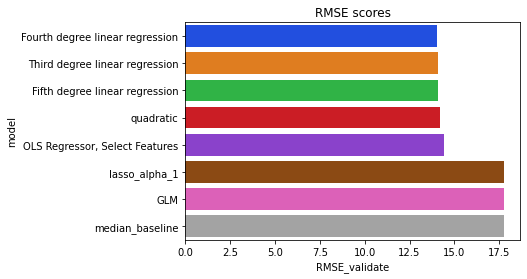

In [196]:
rmse_values = sns.barplot(x = metric_df.RMSE_validate, y= metric_df.model)
title = rmse_values.set(title = "RMSE scores")

The fourth degree linear regression model is our best model. This model performs better than the baseline, thus the fourth degree linear regression model is valid.

### Which songs are most likely to be hits?

Out of curiosity, let's see what song this model predicted to be the most popular.

In [197]:
y_train.sort_values(by = "popularity_pred_lm4", ascending = False).head(3).index

Int64Index([97695, 53650, 118663], dtype='int64')

In [146]:
df.iloc[97695]

index                                                          158067
id                                             6wxZq37sANWYDJiDN5khyL
name                                                      Darte Remix
popularity                                                         70
duration_ms                                                    512060
explicit                                                            1
artists             ['Alex Rose', 'Casper Magico', 'Ñengo Flow', '...
id_artists          ['2DspEsT7UXGKd2VaaedgG4', '1fux65HMCBvfJHqlBc...
release_date                                               2018-07-27
danceability                                                    0.809
energy                                                          0.634
key                                                                 9
loudness                                                       -6.432
mode                                                                0
speechiness         

In [147]:
df.iloc[53650]

index                                    89661
id                      7tUXZgLbOCvRJ9FBlairoU
name                                     Venom
popularity                                  68
duration_ms                             134271
explicit                                     1
artists                         ['Ghostemane']
id_artists          ['3uL4UpqShC4p2x1dJutoRW']
release_date                        2016-07-03
danceability                             0.909
energy                                   0.573
key                                          5
loudness                                -6.856
mode                                         1
speechiness                              0.181
acousticness                            0.0332
instrumentalness                        0.0163
liveness                                 0.657
valence                                  0.392
tempo                                  144.946
time_signature                               4
year_of_relea

In [148]:
df.iloc[118663]

index                                   187969
id                      4GVIKZW6a4q0we4Ebc1FdP
name                            Big Fan Dulled
popularity                                  64
duration_ms                             160847
explicit                                     0
artists                  ['The Noise Project']
id_artists          ['3Q614JyDSProXXN4wXYYk1']
release_date                        2017-05-07
danceability                               0.0
energy                                  0.0354
key                                          2
loudness                               -47.731
mode                                         1
speechiness                                0.0
acousticness                              0.96
instrumentalness                       0.00868
liveness                                0.0923
valence                                    0.0
tempo                                      0.0
time_signature                               0
year_of_relea

In [151]:
y_validate.sort_values(by = "popularity_pred_lm4", ascending = False).head(3).index

Int64Index([2086, 326995, 307995], dtype='int64')

In [152]:
df.iloc[2086]

index                                     8105
id                      6lYqtOrLowtnslyKpyJQqe
name                   Till The Cows Come Home
popularity                                  36
duration_ms                             172973
explicit                                     1
artists                      ['Lucille Bogan']
id_artists          ['2cDKW2JF97WZ5ruG9Obfdf']
release_date                              1933
danceability                             0.682
energy                                   0.132
key                                          7
loudness                               -11.006
mode                                         1
speechiness                              0.121
acousticness                             0.987
instrumentalness                           0.0
liveness                                 0.185
valence                                  0.731
tempo                                  118.436
time_signature                               4
year_of_relea

In [153]:
df.iloc[326995]

index                                                          471029
id                                             4l53vqkvPJK8gbEPP5Jxsk
name                                                 Baby White Noise
popularity                                                         58
duration_ms                                                     83098
explicit                                                            0
artists             ['White Noise Radiance', 'White Noise Baby Sle...
id_artists          ['0QUBaF6Rtta4TTmxYYfzux', '4W12lEvVl5wectUtRN...
release_date                                               2019-07-05
danceability                                                      0.0
energy                                                        0.00002
key                                                                 1
loudness                                                       -9.923
mode                                                                1
speechiness         

In [154]:
df.iloc[307995]

index                                   444437
id                      3z3eMdRX4xR3vE5pnxaXx9
name                     Baby Sleep Pink Noise
popularity                                  52
duration_ms                              80000
explicit                                     0
artists                         ['littleONES']
id_artists          ['2p8rLc4EurmlEyJq770JPl']
release_date                        2019-11-27
danceability                               0.0
energy                                 0.00002
key                                          2
loudness                               -11.126
mode                                         1
speechiness                                0.0
acousticness                               0.0
instrumentalness                           0.0
liveness                                   0.0
valence                                    0.0
tempo                                      0.0
time_signature                               0
year_of_relea

Interestingly, our model has predicted several relaxing background noise as the songs most likely to be popular. 

## Out of Sample Evaluation

In [198]:
y_test.head()

,popularity
49416,0
199305,28
188400,27
161999,32
383661,38


In [199]:
# predict on test
y_test['popularity_pred_lm4'] = lm4.predict(X_test_degree4)

In [200]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.popularity, y_test.popularity_pred_lm4)**(1/2)

print("RMSE for OLS Model using Fourth Degreee LinearRegression with Polynomial Regression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using Fourth Degreee LinearRegression with Polynomial Regression
Out-of-Sample Performance:  14.001565084546748


Our model outperforms baseline on the teset dataset, so it has validity.

In [201]:
y_test.head()

,popularity,popularity_pred_lm4
49416,0,37.206747
199305,28,32.258655
188400,27,27.383505
161999,32,21.407111
383661,38,46.157955


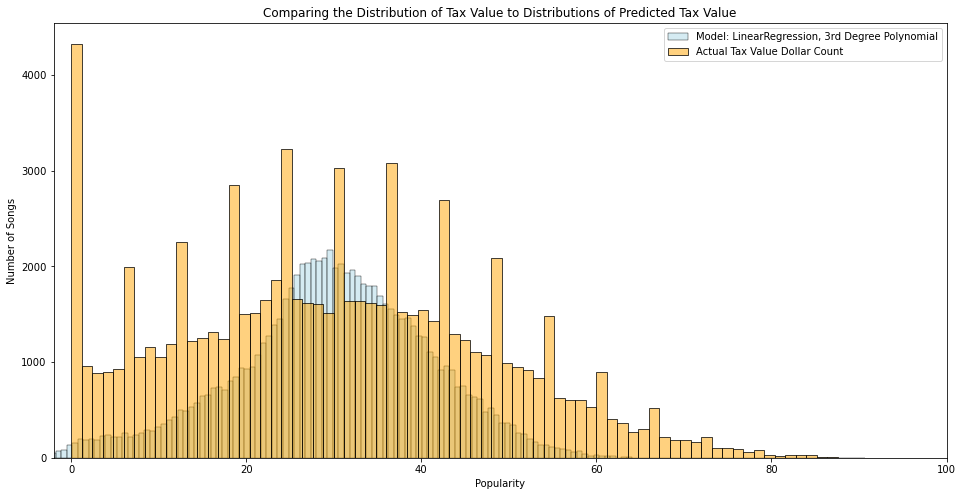

In [202]:
plt.figure(figsize=(16,8))
sns.histplot(y_test.popularity_pred_lm4, color='lightblue', alpha=.5, label="Model: LinearRegression, 3rd Degree Polynomial")
sns.histplot(y_test.popularity, color='orange', alpha=.5, label="Actual Tax Value Dollar Count")
plt.xlim(-2, 100)
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.title("Comparing the Distribution of Tax Value to Distributions of Predicted Tax Value")
plt.legend()
plt.show()

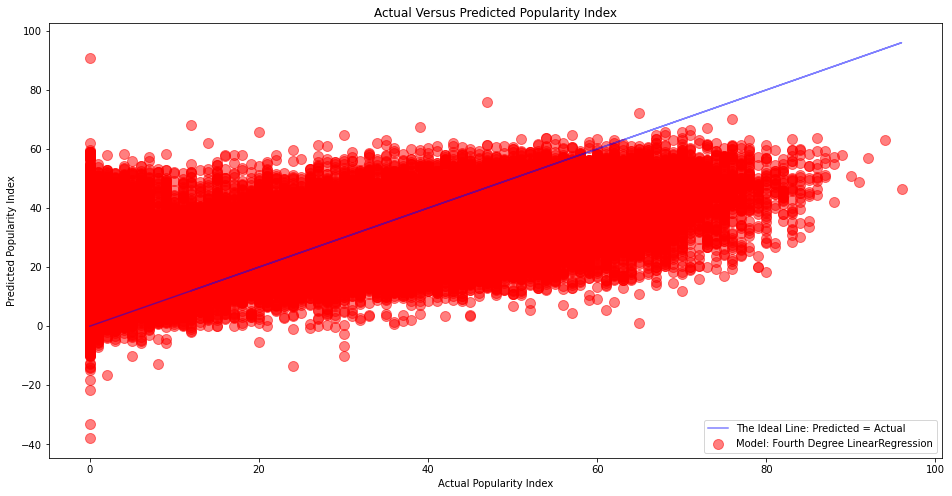

In [204]:
# y_validate.head()
plt.figure(figsize=(16,8))

plt.plot(y_test.popularity, y_test.popularity, alpha=.5, color="blue", label="The Ideal Line: Predicted = Actual")

plt.scatter(y_test.popularity, y_test.popularity_pred_lm4, 
            alpha=.5, color="red", s=100, label="Model: Fourth Degree LinearRegression")
plt.legend()
plt.xlabel("Actual Popularity Index")
plt.ylabel("Predicted Popularity Index")
plt.title("Actual Versus Predicted Popularity Index")
plt.show()

## Bonus: Using Clustering to Categorize Music By Genre

We have already shown that we can use the features of music to predict the popularity of a song with reasonable accuracy. In this section of the project, I would like to show that we can also use clustering technology to group similar songs together by finding patterns in the data.

In [205]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [206]:
X = train[['explicit',
'danceability',
'energy',
'mode',
'key',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'tempo',
'time_signature',
'duration_ms_scaled',
'loudness_scaled',
'valence',
'year_of_release']]

We will use the elbow method to determine our optimum number of clusters. The elbow method means that we will use a line graph to visualize number of cluster vs. inertia. We will look for the "elbow" in the line graph, the part where intertia drops off significantly.



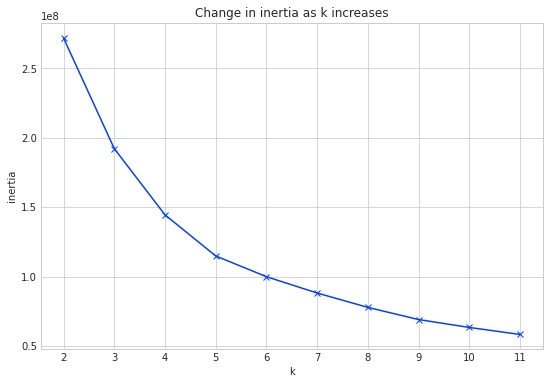

In [596]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [597]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

kmeans.predict(X)

array([5, 5, 0, ..., 1, 0, 2], dtype=int32)

In [598]:
train['cluster'] = kmeans.predict(X)

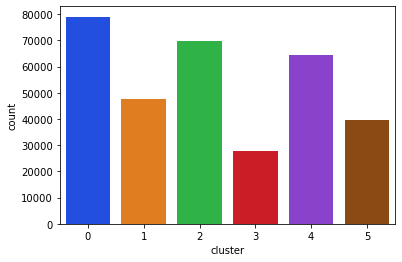

In [599]:
counts_by_cluster = sns.countplot(x = train.cluster)

In [600]:
train.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
404070,4RoQxXt8eSKeSFmhxLXu3x,Oru Ooril,39,279467,0,['Karthik'],['0LSPREIgGMZXCuKVel7LVD'],2003-09-27,0.594,0.633,...,0.281000,0.000000,0.0559,0.757,169.779,4,2003,0.051132,0.818305,5
319183,6FxUiq2HJbjyj4dBnXumrb,Lay down (Candles in the rain),7,274274,0,['Emilíana Torrini'],['08j69Ndyx1P7RLO3Janb5P'],1996-01-01,0.305,0.726,...,0.183000,0.000000,0.1340,0.592,167.728,4,1996,0.050171,0.809412,5
545921,3GcY5WwLab9cMJimIIqSh1,Playful,28,167413,0,['Frankie Animal'],['1YYYGhGZWuWjLTpxdggqpO'],2019-06-07,0.595,0.594,...,0.040500,0.000066,0.1340,0.566,90.053,4,2019,0.030382,0.781858,0
113274,0EvOQBSyW3uSfwpcaj5xLe,Time - 2013 Remaster,11,315855,0,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy'],2015-09-25,0.330,0.652,...,0.192000,0.000003,0.1050,0.369,145.186,4,2015,0.057871,0.787433,2
112835,4i3ilJFJbMwLLK3g0ECkXp,Jy Soen Soos 'n Engel,22,228653,0,['David Fourie'],['3372wrCwHX44K1vjwiZHoA'],2011-04-04,0.601,0.953,...,0.000192,0.000000,0.0971,0.731,125.964,4,2011,0.041723,0.834877,2
243942,1sapJ0ghCrB804CK2SQoLl,Океан и три реки,47,218867,0,['Valery Meladze'],['2igtm1MhKEpmG3PzToJT40'],2003-01-01,0.606,0.864,...,0.120000,0.000000,0.3880,0.724,95.012,4,2003,0.039911,0.841911,0
247901,7H9hrwz5IBDcHeHflB7dZh,Ya No Me Arrepiento,19,247693,0,['Sergio Denis'],['6J19N5JZkGRjuONpiizCIe'],1971-01-01,0.430,0.304,...,0.877000,0.000004,0.2170,0.242,77.332,4,1971,0.045249,0.750726,1
370623,4v3AuNSbedru7LpWlpg1Mp,Zor Yıllar,36,206053,0,"['Kemal Sahir Gürel', 'Erdal Güney', 'Hüseyin ...","['1WeO0UYvbcLvA27hupeCYV', '77PSs92ix6empuwnNu...",2007-01-03,0.289,0.414,...,0.894000,0.000008,0.2240,0.527,78.625,3,2007,0.037538,0.817337,0
145553,47YmRDI67DigzJtlcg0BGK,Sigo Buscando Un Amor,12,409133,0,['Roberto Roena'],['4i5rDrP2IqCdMgde0vIpyB'],1980-12-31,0.536,0.613,...,0.551000,0.007360,0.1290,0.798,104.461,4,1980,0.075144,0.816369,4
545576,1qBycURgOlsk4UtBsSY8XV,Lendaval Vaibal,16,266573,0,['Smilers'],['3gDHpjemovd3LuV3tHgjOq'],2014-04-16,0.665,0.869,...,0.059800,0.000000,0.5770,0.773,99.533,4,2014,0.048745,0.864105,0


We now have six groups of similar sounding songs.

### Group 0

In [603]:
train_0 = train[train.cluster == 0]

In [604]:
train_0.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
545921,3GcY5WwLab9cMJimIIqSh1,Playful,28,167413,0,['Frankie Animal'],['1YYYGhGZWuWjLTpxdggqpO'],2019-06-07,0.595,0.59400,...,0.0405,0.000066,0.134,0.566,90.053,4,2019,0.030382,0.781858,0
243942,1sapJ0ghCrB804CK2SQoLl,Океан и три реки,47,218867,0,['Valery Meladze'],['2igtm1MhKEpmG3PzToJT40'],2003-01-01,0.606,0.86400,...,0.1200,0.000000,0.388,0.724,95.012,4,2003,0.039911,0.841911,0
370623,4v3AuNSbedru7LpWlpg1Mp,Zor Yıllar,36,206053,0,"['Kemal Sahir Gürel', 'Erdal Güney', 'Hüseyin ...","['1WeO0UYvbcLvA27hupeCYV', '77PSs92ix6empuwnNu...",2007-01-03,0.289,0.41400,...,0.8940,0.000008,0.224,0.527,78.625,3,2007,0.037538,0.817337,0
545576,1qBycURgOlsk4UtBsSY8XV,Lendaval Vaibal,16,266573,0,['Smilers'],['3gDHpjemovd3LuV3tHgjOq'],2014-04-16,0.665,0.86900,...,0.0598,0.000000,0.577,0.773,99.533,4,2014,0.048745,0.864105,0
415692,5IgHqf44izKwUGgP5dGVlO,Sleep Tight (Instrumental Version),57,74859,0,['Nursery Rhymes 123'],['47tuSUJMhsa3twW6wgKdIW'],2016-01-26,0.833,0.00417,...,0.9790,0.012900,0.137,0.918,89.900,3,2016,0.013243,0.541139,0


Group 0 seems to be mostly upbeat songs with an electronic sound.

### Group 1

In [605]:
train_1 = train[train.cluster == 1]

In [607]:
train_1.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
247901,7H9hrwz5IBDcHeHflB7dZh,Ya No Me Arrepiento,19,247693,0,['Sergio Denis'],['6J19N5JZkGRjuONpiizCIe'],1971-01-01,0.430,0.3040,...,0.877,0.000004,0.2170,0.2420,77.332,4,1971,0.045249,0.750726,1
305610,01tdB0wTXWY4ue7GAySlWl,I've Got It Bad And That Ain T Good,11,372747,0,['Red Garland Quintet'],['0JsWkl2GlMvsvCQzYUQQ97'],1957-01-01,0.545,0.1710,...,0.965,0.921000,0.0976,0.1450,62.303,4,1957,0.068406,0.722634,1
44075,3OWfEECAO2MXsUH5u7J4bE,Get Back In Line,40,184160,0,['The Kinks'],['1SQRv42e4PjEYfPhS0Tk9E'],1970-11-27,0.323,0.5540,...,0.142,0.000044,0.2120,0.4200,93.428,4,1970,0.033483,0.800826,1
337889,5X5YjQO3OqHeAJzpQARMDB,"Hallelujah Chorus - From the Oratorio, ""Messiah""",12,245280,0,['Johnny Mathis'],['21LGsW7bziR4Ledx7WZ1Wf'],1963-10-04,0.404,0.3500,...,0.889,0.000215,0.2290,0.4670,96.672,4,1963,0.044802,0.772044,1
240147,3D4xY8ldSzNHDMP4Zynady,Amparo,32,219693,0,['Antônio Carlos Jobim'],['3pO5VjZ4wOHCMBXOvbMISG'],1970-01-01,0.225,0.0763,...,0.982,0.887000,0.1280,0.0378,82.881,4,1970,0.040063,0.593006,1


Group 1 is more melancholic, slower songs.

### Group 2

In [609]:
train_2 = train[train.cluster == 2]

In [611]:
train_2.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
113274,0EvOQBSyW3uSfwpcaj5xLe,Time - 2013 Remaster,11,315855,0,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy'],2015-09-25,0.330,0.652,...,0.192000,0.000003,0.1050,0.369,145.186,4,2015,0.057871,0.787433,2
112835,4i3ilJFJbMwLLK3g0ECkXp,Jy Soen Soos 'n Engel,22,228653,0,['David Fourie'],['3372wrCwHX44K1vjwiZHoA'],2011-04-04,0.601,0.953,...,0.000192,0.000000,0.0971,0.731,125.964,4,2011,0.041723,0.834877,2
284313,27CunNfh9sPzaNhRirLPjA,Fortunate Fool,38,228653,0,['Jack Johnson'],['3GBPw9NK25X1Wt2OUvOwY3'],2001-02-01,0.772,0.284,...,0.542000,0.001720,0.1090,0.328,129.326,4,2001,0.041723,0.766453,2
262296,2g7ZMGF9V9vuky7fYb2NVZ,Čert a Kača,17,901680,0,"['Marián Labuda', 'R.Mihina', 'M.Matejka', 'V....","['1mHKvmQJOQVhd1nLEkiAZr', '6FDvKh65apZwn8Xr0S...",2002-03-07,0.714,0.437,...,0.826000,0.000000,0.0655,0.487,119.787,4,2002,0.166354,0.740405,2
371127,3VYxTZHWMcuzSSgR03msGs,Eski,41,302138,0,['Şebnem Ferah'],['74xBVPWYoSf5pvo5IkePRO'],2009-12-19,0.552,0.675,...,0.333000,0.000000,0.1070,0.317,125.898,4,2009,0.055331,0.860680,2


Group 2 has an acoustic rock-and-roll quality.

### Group 3

In [613]:
train_3 = train[train.cluster == 3]

In [614]:
train_3.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
267026,0St7qoRogQ9B9uIqmLdjIr,Red Clay,20,728533,0,['Freddie Hubbard'],['0fTHKjepK5HWOrb2rkS5Em'],1970-01-01,0.530,0.388,...,0.338,0.261000,0.0958,0.587,139.339,4,1970,0.134290,0.715999,3
189759,5oD4obArjBOP28YjclhcNr,O Astronauta - Instrumental,19,181613,0,"['Odette Lara', 'Vinícius de Moraes']","['1qCTWVxt74ULl0u12pjnTc', '5HlnN6xF2MD87KhGRm...",1963-01-01,0.423,0.479,...,0.186,0.000002,0.2550,0.591,153.212,4,1963,0.033012,0.736872,3
2186,1P3YFEDFTCSSQ4KVoUgO7t,Smashin' Thirds,4,184920,0,['Fats Waller'],['0DYWCXTkNqGFZIf67SrWEa'],1926-01-01,0.541,0.247,...,0.982,0.868000,0.1310,0.812,111.664,4,1926,0.033624,0.625244,3
136319,7nKfyxYFXf5HdwSbeLFq1l,Blueberry Hill,0,199101,0,['Russ Morgan'],['4p2WNjwHrHBUD9XJBmbf7H'],1944-01-01,0.313,0.218,...,0.799,0.006770,0.1280,0.316,115.668,4,1944,0.036250,0.739790,3
514476,08CkhcDtEogvbDzCIOBivc,Summertime,0,201520,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1950-09-01,0.268,0.322,...,0.988,0.288000,0.6020,0.319,146.201,4,1950,0.036698,0.711699,3


Group 3 has an instrumental, jazzy, old-time feel.

### Group 4

In [624]:
train_4 = train[train.cluster == 4]

In [625]:
train_4.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
145553,47YmRDI67DigzJtlcg0BGK,Sigo Buscando Un Amor,12,409133,0,['Roberto Roena'],['4i5rDrP2IqCdMgde0vIpyB'],1980-12-31,0.536,0.613,...,0.5510,0.007360,0.129,0.798,104.461,4,1980,0.075144,0.816369,4
452182,1i1SZziMzvtv49MXiJKmcv,Evangelina,19,225253,0,['Jonathan Edwards'],['7gyVuJLsatWofXCAw1SGxM'],1977-01-01,0.640,0.325,...,0.4410,0.293000,0.150,0.765,132.707,4,1977,0.041093,0.679553,4
207534,4AOQOmkh8YT3HA8e0xBw76,Cervecita,16,166547,0,['Los Shapis'],['3LorjMdYWKEtf3wdNtjM6v'],1995-08-08,0.594,0.685,...,0.7190,0.000082,0.224,0.892,113.193,4,1995,0.030222,0.847195,4
167720,54toym5sP7H1vi8NxMTlFH,Desperate Dreams,37,286933,0,['Survivor'],['26bcq2nyj5GB7uRr558iQg'],1988-09-25,0.625,0.646,...,0.0691,0.000035,0.114,0.362,121.647,4,1988,0.052515,0.754704,4
377606,6yPVqp3Nt2mFzvdExaIWP9,J'attendrai,33,177973,0,['Claude François'],['0P2p1bqVyP2EgqubwjTBUJ'],1993-01-01,0.521,0.587,...,0.2850,0.000000,0.114,0.619,123.587,4,1993,0.032338,0.852325,4


Group 4 has a traditional Latin/country sound.

### Group 5

In [621]:
train_5 = train[train.cluster == 5]

In [622]:
train_5.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
404070,4RoQxXt8eSKeSFmhxLXu3x,Oru Ooril,39,279467,0,['Karthik'],['0LSPREIgGMZXCuKVel7LVD'],2003-09-27,0.594,0.633,...,0.2810,0.0,0.0559,0.757,169.779,4,2003,0.051132,0.818305,5
319183,6FxUiq2HJbjyj4dBnXumrb,Lay down (Candles in the rain),7,274274,0,['Emilíana Torrini'],['08j69Ndyx1P7RLO3Janb5P'],1996-01-01,0.305,0.726,...,0.1830,0.0,0.1340,0.592,167.728,4,1996,0.050171,0.809412,5
275579,4B58w2sCk7y7mcIdIoP7Gd,Especially for You,54,223013,0,['MYMP'],['5elcNQkZ6FCZA3grSOMngY'],2005-03-10,0.698,0.398,...,0.4990,0.0,0.1800,0.758,163.028,4,2005,0.040678,0.784838,5
301637,2QQ0lfEAu3ncUHM3C6Rkg3,Is Anybody Home?,45,218000,0,['Our Lady Peace'],['1lqW59DUEKqvcHc8mVWBtH'],1999-09-06,0.442,0.896,...,0.0219,0.0,0.3830,0.573,155.044,4,1999,0.039750,0.850635,5
557744,27K9pfqACmZxsvNpJ8FSxq,Return to Myself,40,269110,0,['Mari Hamada'],['2lQwmHGmTnEu1jjfAgUAcq'],2008-10-22,0.390,0.922,...,0.0770,0.0,0.0674,0.560,167.729,4,2008,0.049215,0.880047,5


Group 5 has an uplifting, energetic, gospel-like quality. 